In [6]:
# !pip install pandas
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv("Iris.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.shape

(150, 6)

In [10]:
df = df.drop(['Id'], axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [12]:
# !pip install scikit-learn -q

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

In [16]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9666666666666667

In [21]:
# import seaborn as sns

# sns.set(style="whitegrid")

# # Create a scatter plot
# sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=df)

# # Set the title and labels
# plt.title("2D Scatter Plot of Iris Dataset")
# plt.xlabel("Sepal Length (cm)")
# plt.ylabel("Sepal Width (cm)")

# # Show the plot
# plt.show()


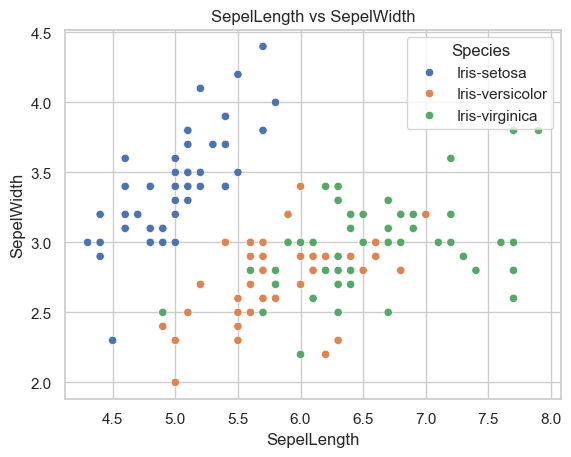

In [26]:
import seaborn as sns

sns.set(style='whitegrid')
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue="Species", data=df)
plt.title("SepelLength vs SepelWidth")
plt.xlabel('SepelLength')
plt.ylabel('SepelWidth')
plt.show()

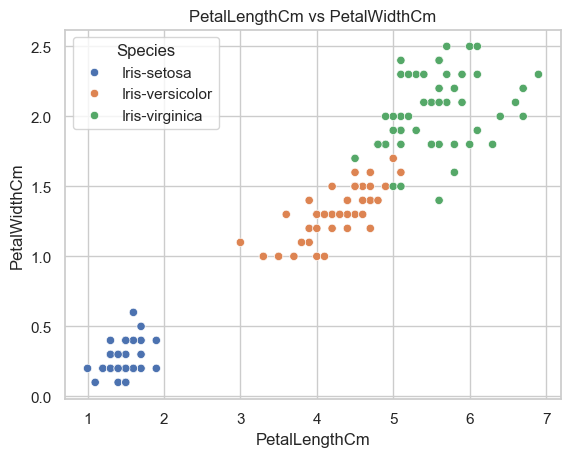

In [28]:
sns.set(style="whitegrid")
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", hue="Species", data=df)
plt.title("PetalLengthCm vs PetalWidthCm")
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.show()

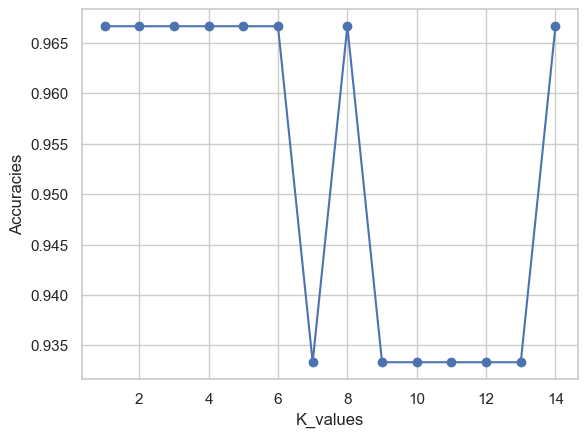

In [33]:
k_values = np.arange(1, 15)
acc = []

for i in k_values:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)

plt.plot(k_values, acc, marker="o")
plt.xlabel("K_values")
plt.ylabel("Accuracies")
plt.show()

In [35]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]], dtype=int64)

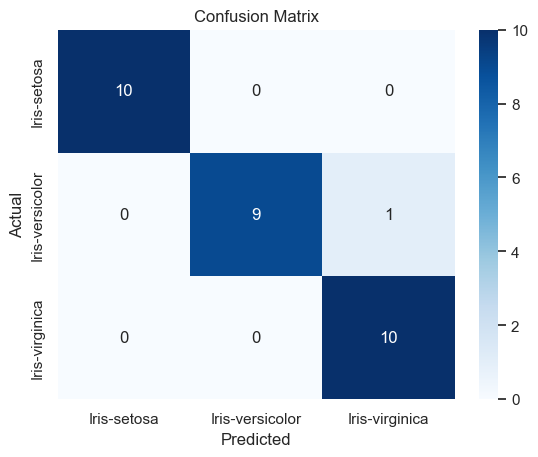

In [40]:
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',xticklabels=df['Species'].unique(), yticklabels=df['Species'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()